<a href="https://colab.research.google.com/github/urosgodnov/juypterNotebooks/blob/main/GROSS_FIXED_CAPITAL_FORMATION_ANALYSIS_OF_COUNTRIES_OVER_TIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROSS FIXED CAPITAL FORMATION ANALYSIS OF COUNTRIES OVER TIME

## Installing and loading necessary packages

**it make take a few minutes**

In [ ]:
install.packages("eurostat")
install.packages("gtsummary")
install.packages("gt")
library(tidyverse)
library(eurostat)
library(gtsummary)
library(gt)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘e1071’, ‘classInt’, ‘RefManageR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Data importing

This code snippet is importing an economic dataset ("nama_10_gdp") from Eurostat. It's designed to create a data frame (data_1) that contains both human-readable labels and corresponding codes for the variables in the dataset. This makes the data easier to understand and work with for further analysis.

In [ ]:
data_1<-get_eurostat("nama_10_gdp", type="label") |>
  dplyr::select(-c(TIME_PERIOD, values)) |>
  rename_with(~paste0(.x,"label"))|>
  bind_cols(get_eurostat("nama_10_gdp", type="code"))

Table nama_10_gdp cached at /tmp/Rtmpdj7JCg/eurostat/c9c1c17400cce42b213d1b7f8cbd98ff.rds

Table nama_10_gdp cached at /tmp/Rtmpdj7JCg/eurostat/035227cace09ab8cc63ff968ac766689.rds



In [ ]:
data_2<-get_eurostat("nama_10_pc", type="label") |>
  dplyr::select(-c(TIME_PERIOD, values)) |>
  rename_with(~paste0(.x,"label"))|>
  bind_cols(get_eurostat("nama_10_pc", type="code"))

Table nama_10_pc cached at /tmp/Rtmpdj7JCg/eurostat/0071827a826df4c48c0fdb57fab92cad.rds

Table nama_10_pc cached at /tmp/Rtmpdj7JCg/eurostat/c37df56816f6d1078d0559519bf63a3f.rds



showing first 6 rows of a dataframe. We use the command head(dataset). By default it displays 6 rows, but we can overwrite this by passing the number of rows, e.g. 10 rows: head(dataset, 10)

In [ ]:
head(data_1)

freqlabel,unitlabel,na_itemlabel,geolabel,freq,unit,na_item,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1995-01-01,176594.2
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1996-01-01,179695.4
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1997-01-01,183613.0
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1998-01-01,190554.0
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,1999-01-01,197178.1
Annual,"Chain linked volumes (2005), million euro","Value added, gross",Austria,A,CLV05_MEUR,B1G,AT,2000-01-01,204320.5


In [ ]:
head(data_2)

freqlabel,unitlabel,na_itemlabel,geolabel,freq,unit,na_item,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1995-01-01,1310
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1996-01-01,1410
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1997-01-01,1270
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1998-01-01,1390
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,1999-01-01,1580
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Albania,A,CLV10_EUR_HAB,B1GQ,AL,2000-01-01,1700


**showing the dataframe structure**

In [ ]:
str(data_1)

tibble [1,006,220 × 10] (S3: tbl_df/tbl/data.frame)
 $ freqlabel   : chr [1:1006220] "Annual" "Annual" "Annual" "Annual" ...
 $ unitlabel   : chr [1:1006220] "Chain linked volumes (2005), million euro" "Chain linked volumes (2005), million euro" "Chain linked volumes (2005), million euro" "Chain linked volumes (2005), million euro" ...
 $ na_itemlabel: chr [1:1006220] "Value added, gross" "Value added, gross" "Value added, gross" "Value added, gross" ...
 $ geolabel    : chr [1:1006220] "Austria" "Austria" "Austria" "Austria" ...
 $ freq        : chr [1:1006220] "A" "A" "A" "A" ...
 $ unit        : chr [1:1006220] "CLV05_MEUR" "CLV05_MEUR" "CLV05_MEUR" "CLV05_MEUR" ...
 $ na_item     : chr [1:1006220] "B1G" "B1G" "B1G" "B1G" ...
 $ geo         : chr [1:1006220] "AT" "AT" "AT" "AT" ...
 $ TIME_PERIOD : Date[1:1006220], format: "1995-01-01" "1996-01-01" ...
 $ values      : num [1:1006220] 176594 179695 183613 190554 197178 ...


In [ ]:
str(data_2)

tibble [129,003 × 10] (S3: tbl_df/tbl/data.frame)
 $ freqlabel   : chr [1:129003] "Annual" "Annual" "Annual" "Annual" ...
 $ unitlabel   : chr [1:129003] "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" ...
 $ na_itemlabel: chr [1:129003] "Gross domestic product at market prices" "Gross domestic product at market prices" "Gross domestic product at market prices" "Gross domestic product at market prices" ...
 $ geolabel    : chr [1:129003] "Albania" "Albania" "Albania" "Albania" ...
 $ freq        : chr [1:129003] "A" "A" "A" "A" ...
 $ unit        : chr [1:129003] "CLV10_EUR_HAB" "CLV10_EUR_HAB" "CLV10_EUR_HAB" "CLV10_EUR_HAB" ...
 $ na_item     : chr [1:129003] "B1GQ" "B1GQ" "B1GQ" "B1GQ" ...
 $ geo         : chr [1:129003] "AL" "AL" "AL" "AL" ...
 $ TIME_PERIOD : Date[1:129003], format: "1995-01-01" "1996-01-01" ...
 $ values      : num [1:129003]

## Data filtering and tidying

The code snippet takes original economic data (data_1), renames a column, adds a year column, and then filters the data to include only the rows related to the specific economic indicators defined in the codes vector. Finally, it displays the first few rows of this filtered data to give you a preview.

In [ ]:
codes <- c("CLV_I15", "PC_GDP", "CP_MEUR", "CLV10_MEUR", "CLV_PCH_PRE", "CON_PPCH_PRE", "PD15_EUR")
eu_countries <- c("AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR",
                  "DE", "GR", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL",
                  "PL", "PT", "RO", "SK", "SI", "ES", "SE","EU27_2020")

data_1_filtered<-data_1 |>
  rename("time_period"="TIME_PERIOD")|>
  mutate(year=year(time_period)) |>
  dplyr::filter(unit %in% codes & geo %in% eu_countries)

head(data_1_filtered)

freqlabel,unitlabel,na_itemlabel,geolabel,freq,unit,na_item,geo,time_period,values,year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1995-01-01,192651.3,1995
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1996-01-01,196034.5,1996
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1997-01-01,200308.3,1997
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1998-01-01,207880.3,1998
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,1999-01-01,215106.8,1999
Annual,"Chain linked volumes (2010), million euro","Value added, gross",Austria,A,CLV10_MEUR,B1G,AT,2000-01-01,222898.6,2000


In [ ]:
str(data_1_filtered)

tibble [156,524 × 11] (S3: tbl_df/tbl/data.frame)
 $ freqlabel   : chr [1:156524] "Annual" "Annual" "Annual" "Annual" ...
 $ unitlabel   : chr [1:156524] "Chain linked volumes (2010), million euro" "Chain linked volumes (2010), million euro" "Chain linked volumes (2010), million euro" "Chain linked volumes (2010), million euro" ...
 $ na_itemlabel: chr [1:156524] "Value added, gross" "Value added, gross" "Value added, gross" "Value added, gross" ...
 $ geolabel    : chr [1:156524] "Austria" "Austria" "Austria" "Austria" ...
 $ freq        : chr [1:156524] "A" "A" "A" "A" ...
 $ unit        : chr [1:156524] "CLV10_MEUR" "CLV10_MEUR" "CLV10_MEUR" "CLV10_MEUR" ...
 $ na_item     : chr [1:156524] "B1G" "B1G" "B1G" "B1G" ...
 $ geo         : chr [1:156524] "AT" "AT" "AT" "AT" ...
 $ time_period : Date[1:156524], format: "1995-01-01" "1996-01-01" ...
 $ values      : num [1:156524] 192651 196034 200308 207880 215107 ...
 $ year        : num [1:156524] 1995 1996 1997 1998 1999 ...


This code snippet filters the economic data in data_2 to focus on:

- EU member states: specified by the eu_countries vector.
- Data from 2000 onwards: using the year >= 2000 condition.
- A particular unit of measurement: "PC_EU27_2020_HAB_MEUR_CP".

The result is a new dataframe, data_2_filtered, containing a subset of the original data, which is then displayed with head().

In [ ]:
eu_countries <- c("AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR",
                  "DE", "GR", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL",
                  "PL", "PT", "RO", "SK", "SI", "ES", "SE","EU27_2020")

data_2_filtered<-data_2 |>
  rename("time_period"="TIME_PERIOD")|>
  mutate(year=year(time_period))|>
  dplyr::filter(geo %in% eu_countries & year>=2000 & unit %in% c("CLV10_EUR_HAB","PC_EU27_2020_HAB_MEUR_CP"))

head(data_2_filtered)

freqlabel,unitlabel,na_itemlabel,geolabel,freq,unit,na_item,geo,time_period,values,year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2000-01-01,31510,2000
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2001-01-01,31800,2001
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2002-01-01,32120,2002
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2003-01-01,32340,2003
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2004-01-01,32960,2004
Annual,"Chain linked volumes (2010), euro per capita",Gross domestic product at market prices,Austria,A,CLV10_EUR_HAB,B1GQ,AT,2005-01-01,33500,2005


In [ ]:
str(data_2_filtered)

tibble [11,664 × 11] (S3: tbl_df/tbl/data.frame)
 $ freqlabel   : chr [1:11664] "Annual" "Annual" "Annual" "Annual" ...
 $ unitlabel   : chr [1:11664] "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" "Chain linked volumes (2010), euro per capita" ...
 $ na_itemlabel: chr [1:11664] "Gross domestic product at market prices" "Gross domestic product at market prices" "Gross domestic product at market prices" "Gross domestic product at market prices" ...
 $ geolabel    : chr [1:11664] "Austria" "Austria" "Austria" "Austria" ...
 $ freq        : chr [1:11664] "A" "A" "A" "A" ...
 $ unit        : chr [1:11664] "CLV10_EUR_HAB" "CLV10_EUR_HAB" "CLV10_EUR_HAB" "CLV10_EUR_HAB" ...
 $ na_item     : chr [1:11664] "B1GQ" "B1GQ" "B1GQ" "B1GQ" ...
 $ geo         : chr [1:11664] "AT" "AT" "AT" "AT" ...
 $ time_period : Date[1:11664], format: "2000-01-01" "2001-01-01" ...
 $ values      : num [1:11664] 31510 3180

## Analysis


### Gross fixed capital formation

#### GDP and Gross fixed capital formation

In [ ]:
units<-c("Chain linked volumes (2010), million euro")
country<-c("EU27_2020")
na_itemlabels<-c("Gross domestic product at market prices",
                 "Gross fixed capital formation")

In [ ]:
df<-data_1_filtered |>
  dplyr::filter(unitlabel %in% units) |>
  dplyr::filter(geo %in% country) |>
  dplyr::filter(na_itemlabel %in% na_itemlabels)|>
  dplyr::select(geo, na_itemlabel, year, values) |>
  pivot_wider(names_from=na_itemlabel, values_from = values)|>
  rename("GDP (in milions EUR)"="Gross domestic product at market prices",
         "investments (in milions EUR)"="Gross fixed capital formation")

  df|>
    gt()|>
      gts()

geo,year,GDP (in milions EUR),investments (in milions EUR)
EU27_2020,1995,8388705,1735747
EU27_2020,1996,8540233,1773106
EU27_2020,1997,8770403,1825982
EU27_2020,1998,9031615,1936246
EU27_2020,1999,9303600,2046218
EU27_2020,2000,9666225,2143999
EU27_2020,2001,9870963,2161197
EU27_2020,2002,9973784,2132083
EU27_2020,2003,10062976,2159057
EU27_2020,2004,10318180,2220807


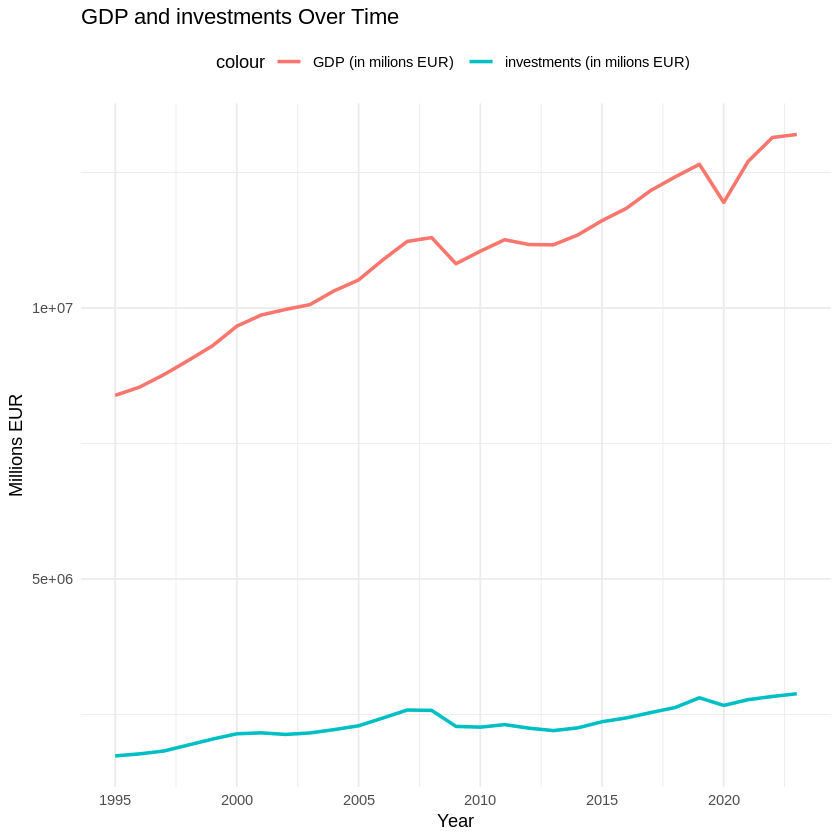

In [ ]:
df |>
  ggplot(aes(x = year)) +
  geom_line(aes(y = `GDP (in milions EUR)`, color = "GDP (in milions EUR)"), linewidth = 1) +
  geom_line(aes(y = `investments (in milions EUR)`, color = "investments (in milions EUR)"), linewidth = 1) +
  labs(
    title = "GDP and investments Over Time",
    x = "Year",
    y = "Millions EUR"
  ) +
  theme_minimal() +
  theme(legend.position = "top")

#### Display of the trend of 'inventories' in gross fixed capital formation


In [ ]:
units<-c("Current prices, million euro")
country<-c("EU27_2020")
na_itemlabels<-c("Changes in inventories and acquisitions less disposals of valuables","Gross fixed capital formation")


In [ ]:
df<-data_1_filtered |>
  dplyr::filter(unitlabel %in% units) |>
  dplyr::filter(geo %in% country) |>
  dplyr::filter(na_itemlabel %in% na_itemlabels)|>
  dplyr::select(geo, na_itemlabel, year, values) |>
  pivot_wider(names_from=na_itemlabel, values_from = values)|>
  rename("Inventories (in milions EUR)"="Changes in inventories and acquisitions less disposals of valuables",
         "investments (in milions EUR)"="Gross fixed capital formation")

  df|>
    gt()|>
      gts()

geo,year,investments (in milions EUR),Inventories (in milions EUR)
EU27_2020,1995,1363798,49728.9
EU27_2020,1996,1420126,21644.2
EU27_2020,1997,1456754,36284.7
EU27_2020,1998,1550065,60973.4
EU27_2020,1999,1657787,40807.5
EU27_2020,2000,1790406,56738.5
EU27_2020,2001,1837200,51434.0
EU27_2020,2002,1843387,23702.7
EU27_2020,2003,1883425,25480.2
EU27_2020,2004,1981523,41486.0


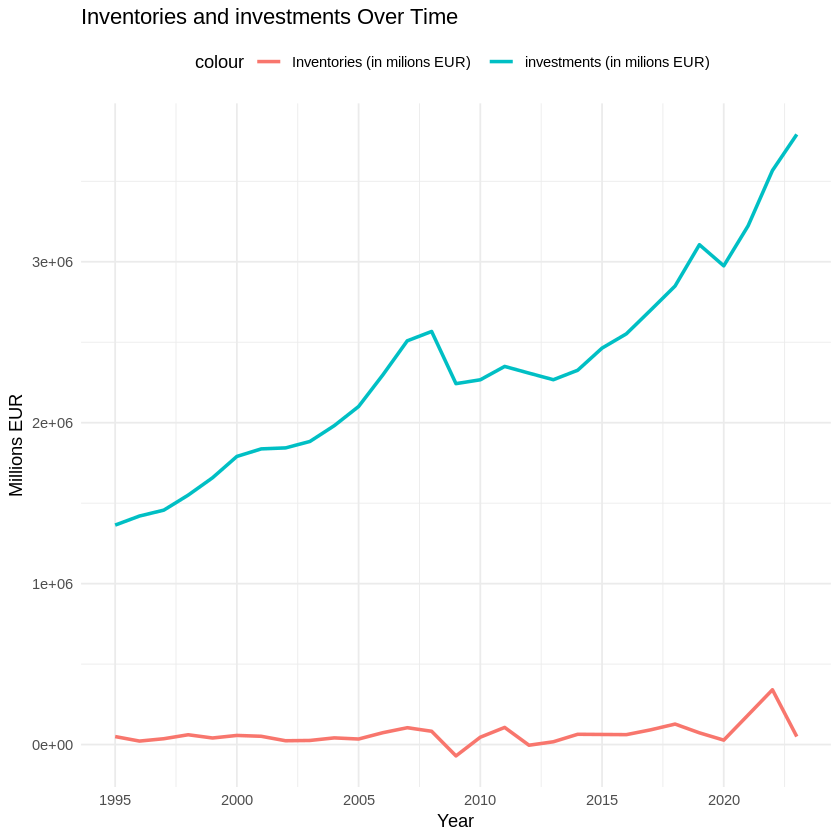

In [ ]:
df |>
  ggplot(aes(x = year)) +
  geom_line(aes(y = `Inventories (in milions EUR)`, color = "Inventories (in milions EUR)"), linewidth = 1) +
  geom_line(aes(y = `investments (in milions EUR)`, color = "investments (in milions EUR)"), linewidth = 1) +
  labs(
    title = "Inventories and investments Over Time",
    x = "Year",
    y = "Millions EUR"
  ) +
  theme_minimal() +
  theme(legend.position = "top")

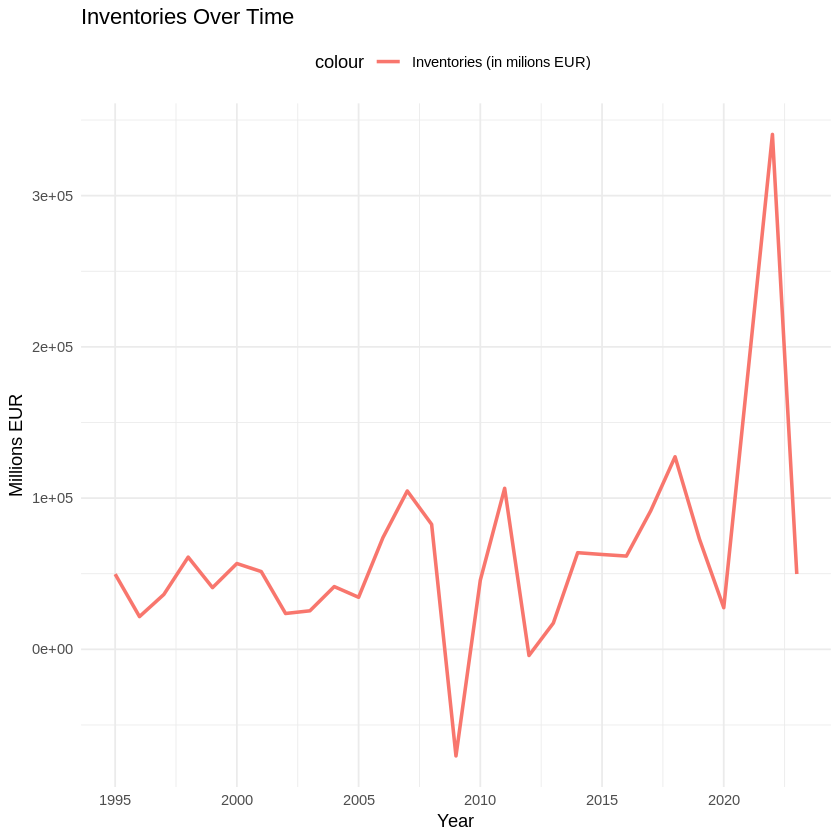

In [ ]:
df |>
  ggplot(aes(x = year)) +
  geom_line(aes(y = `Inventories (in milions EUR)`, color = "Inventories (in milions EUR)"), linewidth = 1) +
  labs(
    title = "Inventories Over Time",
    x = "Year",
    y = "Millions EUR"
  ) +
  theme_minimal() +
  theme(legend.position = "top")

#### Investment over time (country vs. EU average)

**Just change country<-c("AT") with the code of a different country if you want to compare different country with eu average**

In [ ]:
units<-c("Chain linked volumes (2010), million euro")
country<-c("AT")
na_itemlabels<-c("Gross fixed capital formation")

In [ ]:
df<-data_1_filtered |>
  dplyr::filter(unitlabel %in% units) |>
  dplyr::filter(geo %in% c("EU27_2020",country)) |>
  dplyr::filter(na_itemlabel %in% na_itemlabels)|>
  dplyr::filter(year>=2000) |>
  dplyr::select(geo, year, values) |>
  pivot_wider(names_from=geo, values_from = values)

   df|>
    gt()|>
      gts()

year,AT,EU27_2020
2000,65052.8,2143999
2001,64397.7,2161197
2002,62353.0,2132083
2003,64800.5,2159057
2004,65544.5,2220807
2005,65800.2,2291080
2006,66677.7,2435609
2007,69680.7,2582334
2008,70914.4,2575533
2009,65912.6,2280207


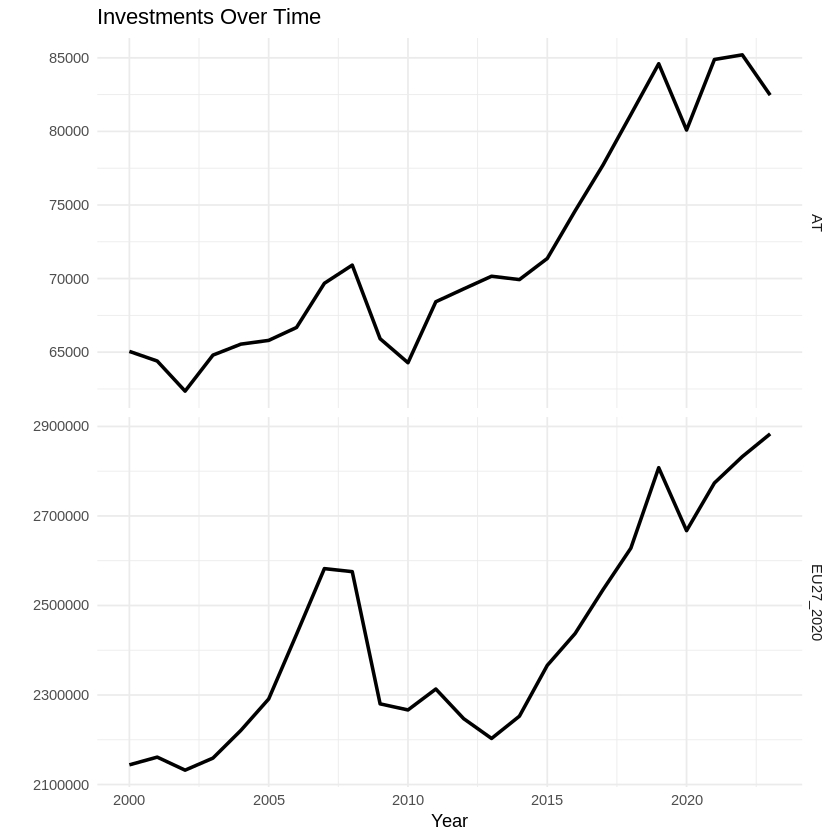

In [ ]:
df |>
  pivot_longer(-year, names_to = "country")|>
  ggplot(aes(x = year)) +
  geom_line(aes(y=value),linewidth=1) +
  labs(
    title = "Investments Over Time",
    x = "Year",
    y = ""
  ) +
  facet_grid(vars(country), scale="free")+
  theme_minimal() +
  theme(legend.position = "top")



#### Investment as GDP percentage

In [ ]:
units<-"Percentage of gross domestic product (GDP)"
na_items<-"Gross capital formation"

In [ ]:
df<-data_1_filtered |>
  dplyr::filter(unitlabel %in% units) |>
  dplyr::filter(year==2023) |>
  dplyr::filter(na_itemlabel %in% na_items) |>
  dplyr::select(geo, values) |>
  rename("% GDP"="values")

   df|>
    gt() |>
    gts()

geo,% GDP
AT,25.4
BE,25.3
BG,19.7
CY,20.5
CZ,28.0
DE,21.7
DK,22.8
EE,27.7
ES,21.0
EU27_2020,22.3


The **fill aesthetic** in ggplot2 is used to set the color of bars (or other filled shapes like areas) based on a specific variable or condition.

Here’s how it works:

- When fill is mapped to a variable: Each unique value of the variable gets a different color, which is helpful for distinguishing categories within the data.
For example, fill = geo would assign different colors to each geographic region.
- Conditional fill: In our example, we used fill = geo == "EU27_2020". This creates a logical condition:
geo == "EU27_2020" is TRUE for the row where geo is "EU27_2020" and FALSE for other rows.

By setting scale_fill_manual(values = c("TRUE" = "red", "FALSE" = "steelblue")), we define custom colors for these two conditions:
Bars where geo is "EU27_2020" are filled in red (when the condition is TRUE).

All other bars are filled in steel blue (when the condition is FALSE).
This approach highlights specific bars in a different color based on a condition, which is useful for emphasizing particular data points.

**Coord_flip()**

The coord_flip() function in ggplot2 flips the x and y axes of the plot, effectively rotating the chart by 90 degrees.

Here’s why and when it’s useful:

- Flipping Axes: With coord_flip(), what is normally the x-axis becomes the y-axis, and vice versa. This turns vertical bars into horizontal bars, with the categories (like geographic regions) now listed along the y-axis.

- Improving Readability: coord_flip() is particularly helpful when:

 - You have long category labels on the x-axis (like country names) that would overlap if displayed horizontally.
 - The chart has many categories, and displaying them vertically would make the x-axis too crowded.

In a horizontal bar chart, the labels are easier to read since they are aligned along the y-axis. The values (% GDP in this case) become easier to compare as the bars are aligned horizontally.

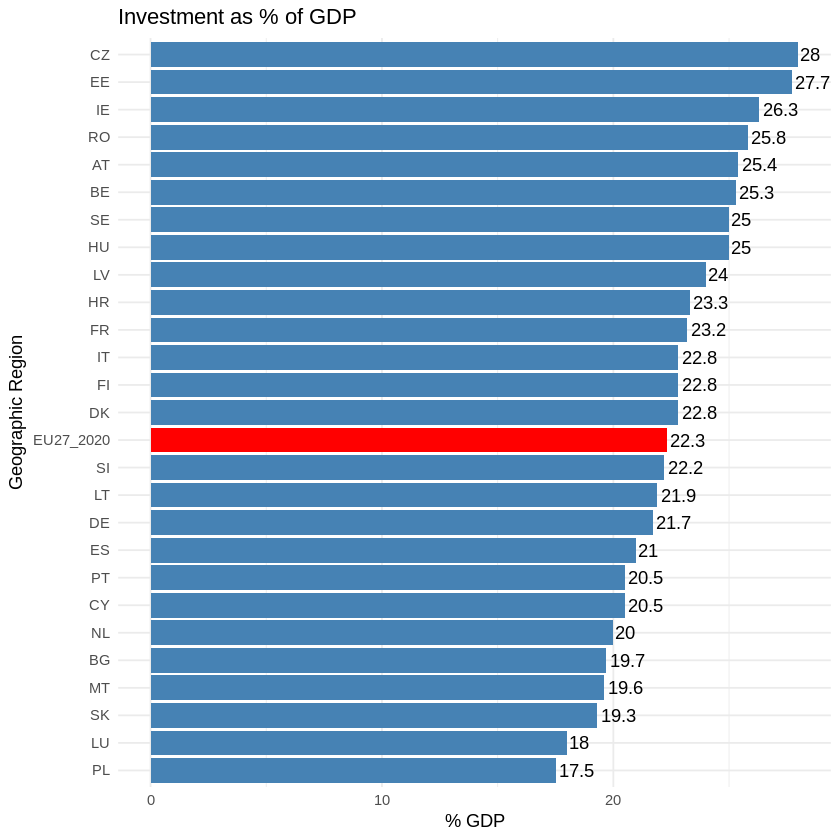

In [ ]:
ggplot(df, aes(x = reorder(geo, `% GDP`), y = `% GDP`, fill = geo == "EU27_2020")) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = round(`% GDP`, 2)), hjust = -0.1) +
  scale_fill_manual(values = c("TRUE" = "red", "FALSE" = "steelblue")) +  # Red for EU27_2020, blue for others
  labs(
    title = "Investment as % of GDP",
    x = "Geographic Region",
    y = "% GDP"
  ) +
  coord_flip() +  # Flip the x and y axes
  theme_minimal() +
  theme(legend.position = "none")


In [ ]:
units<-"Percentage of gross domestic product (GDP)"
na_items<-"Gross capital formation"
country<-"EU27_2020"

In [ ]:
df<-data_1_filtered |>
  dplyr::filter(unitlabel %in% units) |>
  dplyr::filter(geo %in% country) |>
  dplyr::filter(na_itemlabel %in% na_items) |>
  dplyr::filter(year>=2000) |>
  dplyr::select(geo, year, values) |>
  rename("% GDP"="values")

   df|>
    gt() |>
    gts()

geo,year,% GDP
EU27_2020,2000,23.4
EU27_2020,2001,22.9
EU27_2020,2002,21.8
EU27_2020,2003,21.7
EU27_2020,2004,22.0
EU27_2020,2005,22.2
EU27_2020,2006,23.3
EU27_2020,2007,24.2
EU27_2020,2008,23.8
EU27_2020,2009,20.4


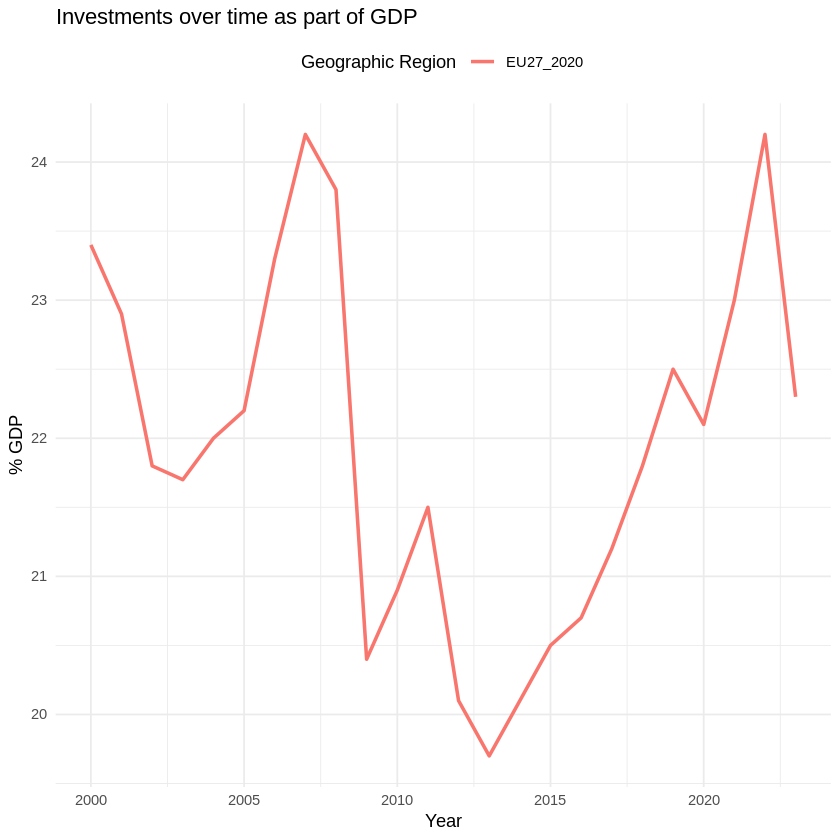

In [ ]:
ggplot(df, aes(x = year, y = `% GDP`, color = geo, group = geo)) +
  geom_line(linewidth = 1) +
  labs(
    title = "Investments over time as part of GDP",
    x = "Year",
    y = "% GDP",
    color = "Geographic Region"
  ) +
  theme_minimal() +
  theme(legend.position = "top")

#### Investment as contribution to GDP growth

In [ ]:
units<-"Contribution to GDP growth, percentage point change on previous period"
na_items<-"Gross capital formation"
country<-"EU27_2020"

In [ ]:
df<-data_1_filtered |>
  dplyr::filter(unitlabel %in% units) |>
  dplyr::filter(year==2023) |>
  dplyr::filter(na_itemlabel %in% na_items) |>
  dplyr::select(geo, values) |>
  rename("% change"="values")

   df|>
    gt() |>
    gts()

geo,% change
AT,-3.80
BE,0.40
BG,-2.89
CY,0.37
CZ,-2.03
DE,-0.17
DK,-3.24
EE,-0.98
ES,-0.36
EU27_2020,-0.89


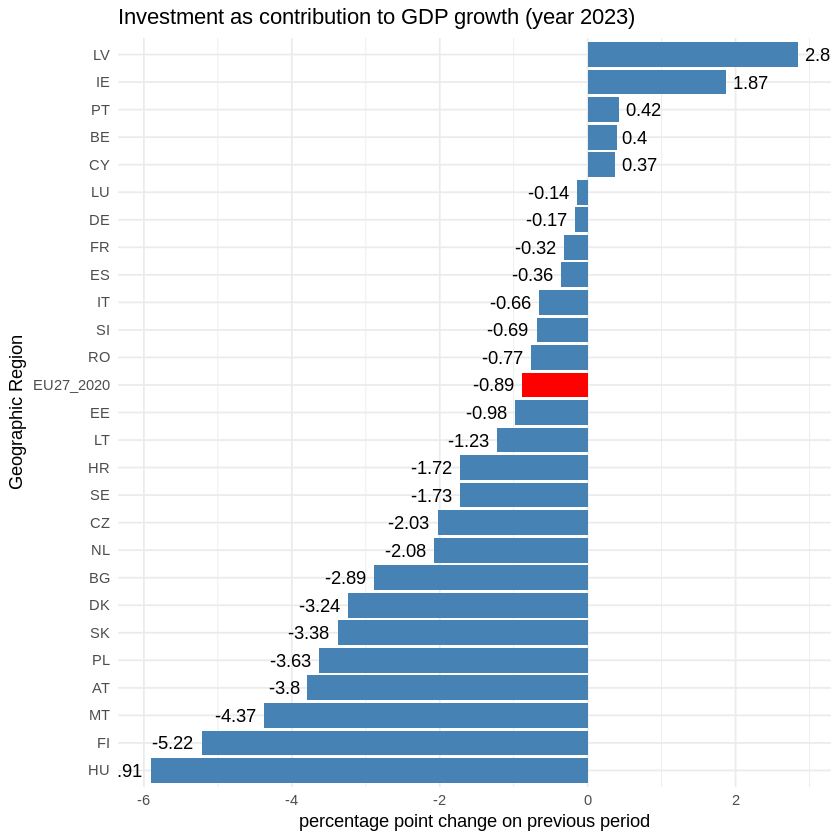

In [ ]:
ggplot(df, aes(x = reorder(geo, `% change`), y = `% change`, fill = geo == "EU27_2020")) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = round(`% change`, 2), hjust = ifelse(`% change` > 0, -0.2, 1.2)), color = "black") +
  scale_fill_manual(values = c("TRUE" = "red", "FALSE" = "steelblue")) +  # Red for EU27_2020, blue for others
  labs(
    title = "Investment as contribution to GDP growth (year 2023)",
    x = "Geographic Region",
    y = "percentage point change on previous period"
  ) +
  coord_flip() +  # Flip the x and y axes
  theme_minimal() +
  theme(legend.position = "none")


In [ ]:
units<-"Contribution to GDP growth, percentage point change on previous period"
na_items<-"Gross capital formation"
country<-"EU27_2020"

In [ ]:
df<-data_1_filtered |>
  dplyr::filter(unitlabel %in% units) |>
  dplyr::filter(year>=2000) |>
  dplyr::filter(geo %in% country) |>
  dplyr::filter(na_itemlabel %in% na_items) |>
  dplyr::select(geo,year, values) |>
  rename("% change"="values")

   df|>
    gt() |>
    gts()

geo,year,% change
EU27_2020,2000,1.18
EU27_2020,2001,0.10
EU27_2020,2002,-0.62
EU27_2020,2003,0.26
EU27_2020,2004,0.70
EU27_2020,2005,0.54
EU27_2020,2006,1.70
EU27_2020,2007,1.62
EU27_2020,2008,-0.29
EU27_2020,2009,-4.06


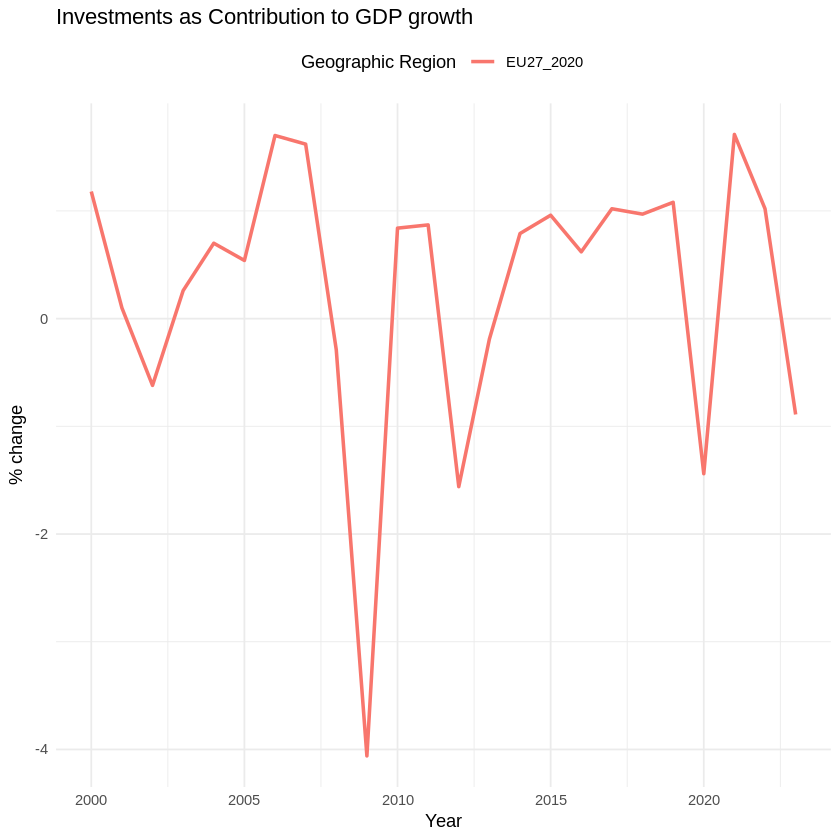

In [ ]:
ggplot(df, aes(x = year, y = `% change`, color = geo, group = geo)) +
  geom_line(linewidth = 1) +
  labs(
    title = "Investments as Contribution to GDP growth",
    x = "Year",
    y = "% change",
    color = "Geographic Region"
  ) +
  theme_minimal() +
  theme(legend.position = "top")